In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob

from PhicoreModules import parse_genbank, median, mean, stdev, mode
from PhicoreModules import get_features_of_type, get_features_lengths, get_gc_content, get_coding_density, get_distribution_of_stops # Przemek's functions
from PhicoreModules import get_mean_cds_length_rec_window, get_rolling_gc, get_rolling_mean_cds # George's functions
from PhicoreModules import write_df_to_artemis

## Checking various stats

In [7]:
infiles = glob.glob('./genbank/Bc01-TAG-TGA-TAA.gbk')
outdir = 'tmp'
if not os.path.exists(outdir): os.mkdir(outdir)

print("=== Some basic statistics ===")
for infile in ['./genbank/Bc01*.gbk']:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        df = get_distribution_of_stops(record, window=500, step=30)
        df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
        df = get_rolling_gc(record, window=500, step=30)
        df.plot(x="x", y=["C", "G", "GC"], figsize=(40, 8))
        df = get_rolling_mean_cds(record, window=2000, step=30)
        df.plot(x="x", y=["Mean_CDS"], figsize=(40, 8))
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'CDS')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'CDS')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))

infiles = glob.glob('./genbank/Bc02*.gbk')
for infile in ['./genbank/Bc02-TAG-TGA-TAA.gbk', './genbank/Bc02-TGA-TAA.gbk']:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        df = get_distribution_of_stops(record, window=500, step=30)
        df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
        df = get_rolling_gc(record, window=500, step=30)
        df.plot(x="x", y=["C", "G", "GC"], figsize=(40, 8))
        df = get_rolling_mean_cds(record, window=2000, step=30)
        df.plot(x="x", y=["Mean_CDS"], figsize=(40, 8))
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'CDS')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'CDS')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))


for record in parse_genbank('./genbank/Bc01-TAG-TGA-TAA.gbk'):
    df_all = get_rolling_mean_cds(record, window=2000, step=30)
for record in parse_genbank('./genbank/Bc01-TGA-TAA.gbk'):
    df_tag = get_rolling_mean_cds(record, window=2000, step=30)
    df_stop = get_distribution_of_stops(record, window=500, step=30)

df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAG-TGA-TAA.gbk'):
    df_all = get_rolling_mean_cds(record, window=2000, step=30)
for record in parse_genbank('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TGA-TAA.gbk'):
    df_tag = get_rolling_mean_cds(record, window=2000, step=30)
    df_stop = get_distribution_of_stops(record, window=500, step=30)

df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))


# for record in genbank_seqio('./genbank/Bc02-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/Bc02-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# for record in genbank_seqio('./genbank/Bc11-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/Bc11-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# for record in genbank_seqio('./genbank/GCA_002135175.2-subset-TAG-TGA-TAA.gbk'):
#     df_all = get_rolling_mean_cds(record, window=5000, step=30)
# for record in genbank_seqio('./genbank/GCA_002135175.2-subset-TGA-TAA.gbk'):
#     df_tag = get_rolling_mean_cds(record, window=5000, step=30)
#     df_stop = get_distribution_of_stops(record, window=500, step=30)

# df_tag['Mean_CDS_all'] = df_all['Mean_CDS']
# df_tag.plot(x="x", y=["Mean_CDS", "Mean_CDS_all"], figsize=(40, 8))
# df_stop.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))

# record = list(genbank_seqio(infiles[0]))[0]
# print(get_average_cds_length_rec(record))
# df = get_distribution_of_stops(record, window=1200, step=200)

# df.plot(x="x", y=["TAA", "TAG", "TGA"], figsize=(40, 8))
# print(df.head(150))
# visualise(df.drop(['x'], axis=1), length=len(df['x']), labels=['TAA', 'TAG', 'TGA'])
# df = get_distribution_of_stops(record, window=1200, step=200)
# visualise(df.drop(['x'], axis=1), length=len(df['x']), labels=['TAA', 'TAG', 'TGA'])

=== Some basic statistics ===
=== Working on file ./genbank/Bc01*.gbk ===


There was an error opening ./genbank/Bc01*.gbk


AssertionError: 

# Testing functions

In [6]:
infiles = glob.glob('./genbank/Bc01.fasta-TAG-TGA-TAA.gbk')
outdir = 'tmp'
if not os.path.exists(outdir): os.mkdir(outdir)

print("=== Some basic statistics ===")
for infile in infiles[:1]:
    print("Input file: {}".format(os.path.basename(infile)))
    for record in parse_genbank(infile):
        print("Stats for {} ({} bp)".format(record.id, len(record.seq)))
        print("GC content: {}".format(get_gc_content(record.seq)))
        cdss = get_features_of_type(record, 'tRNA')
        print("Number of CDS: {}".format(len(cdss)))
        cdss_lengths = get_features_lengths(record, 'tRNA')
        print("Average CDS length: {}".format(mean(cdss_lengths)))
        print("Median CDS length: {}".format(median(cdss_lengths)))
        print("Average coding density: {}".format(get_coding_density(record)))
        df = get_distribution_of_stops(record, window=210, step=1)
        df_stops_file = os.path.join(outdir, '{}.{}_stops.csv'.format(os.path.basename(infile), record.id))
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_file)

print("=== Average coding densities ===")
for infile in infiles:
    for record in parse_genbank(infile):
        print("{} - {}: {}".format(os.path.basename(infile), record.id, get_coding_density(record, ['CDS', 'tRNA'])))

=== Some basic statistics ===
Input file: Bc01.fasta-TAG-TGA-TAA.gbk
Stats for cluster_001_consensus (100102 bp)
GC content: 0.3508621206369503
Number of CDS: 22
Average CDS length: 75.27272727272727
Median CDS length: 73.0
Average coding density: 0.9653453477452998


/home/nala0006/miniconda3/envs/trnascan/lib/python3.10/site-packages/Bio/GenBank/Scanner.py:1554: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       cluster_001_consensus    100102 bp    DNA             PHG\n'
  warnings.warn(


Writing distribution of stops to tmp/Bc01.fasta-TAG-TGA-TAA.gbk.cluster_001_consensus_stops.csv
=== Average coding densities ===
Bc01.fasta-TAG-TGA-TAA.gbk - cluster_001_consensus: 0.9653453477452998


## Work in progress on STOP codons entropy per frame

=== Working on file ./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk ===
 = Getting overall distribution of stops
Writing distribution of stops to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.txt


/home/dec/miniconda3/lib/python3.9/site-packages/Bio/GenBank/Scanner.py:1555: BiopythonParserWarning: Malformed LOCUS line found - is this correct?
:'LOCUS       MZ130495.1    101130 bp    DNA             PHG\n'
  warnings.warn(


Writing plot of the distribution to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.png
 = Getting distribution of stops per frame
Writing distribution of stops to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.txt
Writing plot of the distribution to tmp/UAG-readthrough_crAss_clade_sp._strain_cr150_1-TAA.gbk.MZ130495.1_stops.png


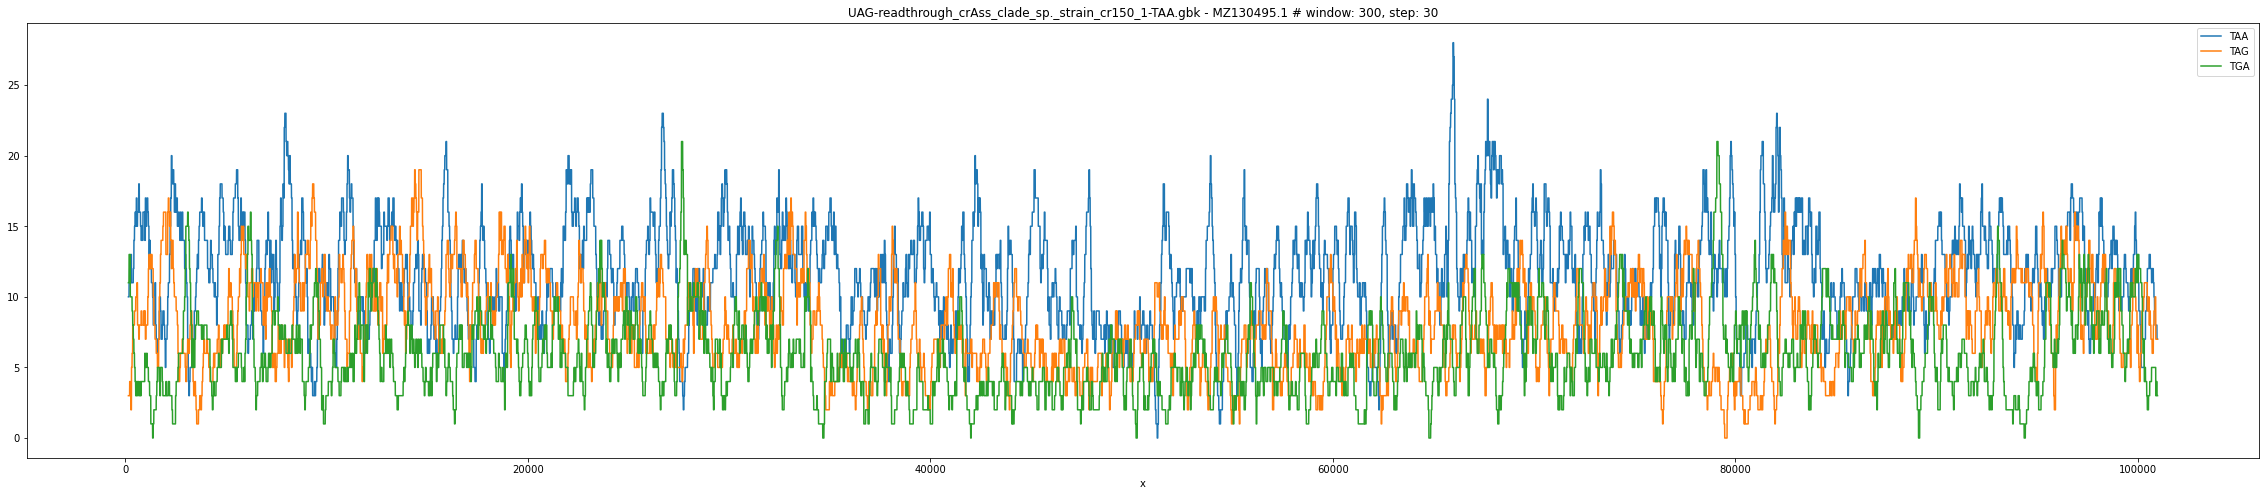

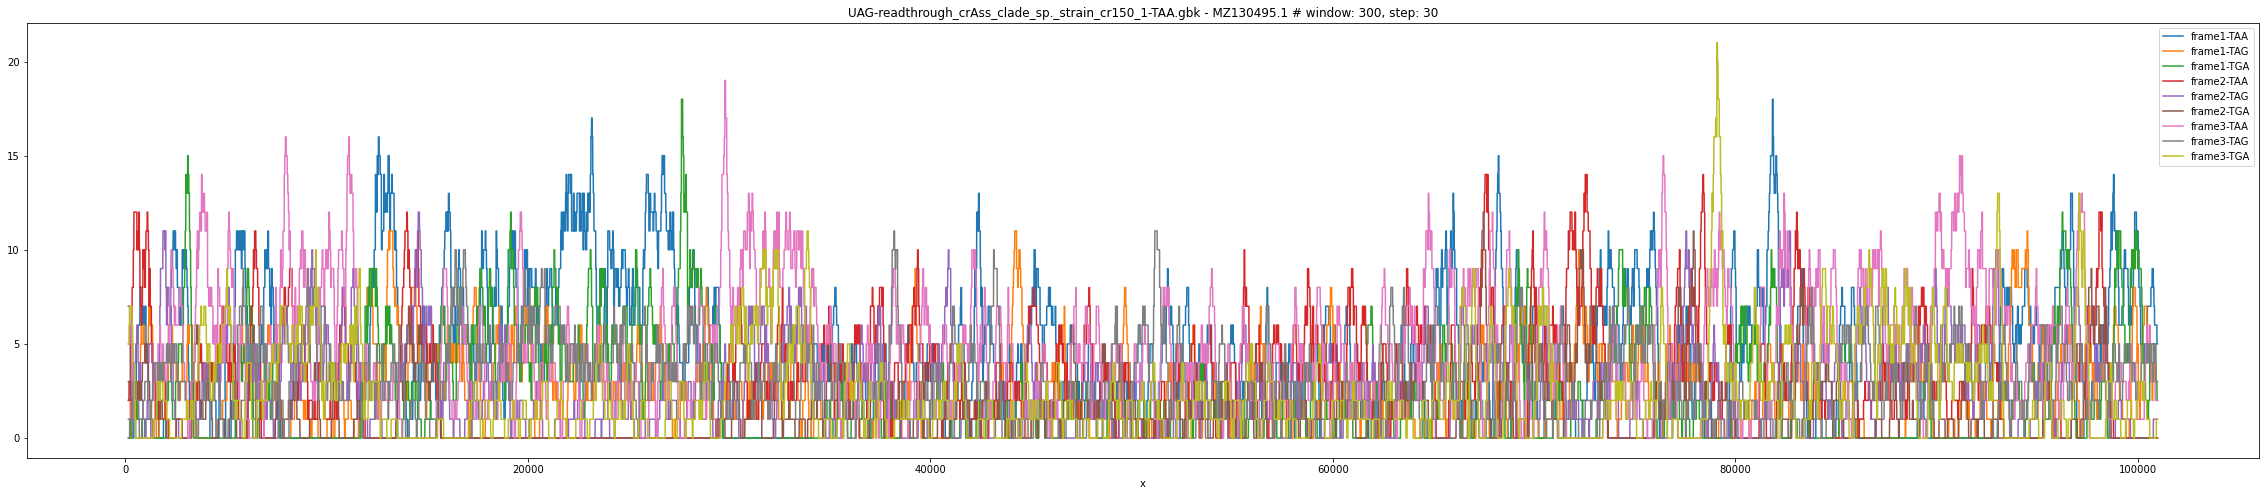

In [24]:
infiles = glob.glob('./genbank/UAG-readthrough_crAss_clade_sp._strain_cr150_1*.gbk')
for infile in infiles[:1]:
    print("=== Working on file {} ===".format(infile))
    for record in parse_genbank(infile):
        # output files
        df_stops_file = os.path.join(outdir, '{}.{}_stops.txt'.format(os.path.basename(infile), record.id))
        df_stops_per_frame_file = os.path.join(outdir, '{}.{}_stops_per_frame.txt'.format(os.path.basename(infile), record.id))
        df_stops_plot_file = os.path.join(outdir, '{}.{}_stops.png'.format(os.path.basename(infile), record.id))
        df_stops_per_frame_plot_file = os.path.join(outdir, '{}.{}_stops_per_frame.png'.format(os.path.basename(infile), record.id))
        # data
        window = 300
        step = 30

        print(" = Getting overall distribution of stops")
        df = get_distribution_of_stops(record, window, step)
        df.plot(
            x="x", 
            y=df.columns[1:], 
            figsize=(40, 8), 
            legend=True, 
            title="{} - {} # window: {}, step: {}".format(os.path.basename(infile), record.id, window, step)
        )
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_file)
        print("Writing plot of the distribution to {}".format(df_stops_plot_file))
        plt.savefig(df_stops_plot_file)

        print(" = Getting distribution of stops per frame")
        df = get_distribution_of_stops_per_frame(record, window, step)
        df.plot(
            x="x", 
            y=df.columns[1:], 
            figsize=(40, 8), 
            legend=True, 
            title="{} - {} # window: {}, step: {}".format(os.path.basename(infile), record.id, window, step)
        )
        print("Writing distribution of stops to {}".format(df_stops_file))
        write_df_to_artemis(df, df_stops_per_frame_file)
        print("Writing plot of the distribution to {}".format(df_stops_plot_file))
        plt.savefig(df_stops_per_frame_plot_file)